# 컬러 이미지 다중 분류류
---
CIFAR-10 :: 10개 class 중 어떤 사진인지 분류

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
y_train[:5]
# 나중에 flatten 해야한다

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
samples = np.random.randint(len(X_train), size=9)
samples

array([27856, 31515, 17613, 46523, 27883, 46785,  3451, 11146, 20857])

In [7]:
y_train = y_train.reshape(-1)
y_test = y_test.flatten()
y_train.shape, y_test.shape

((50000,), (10000,))

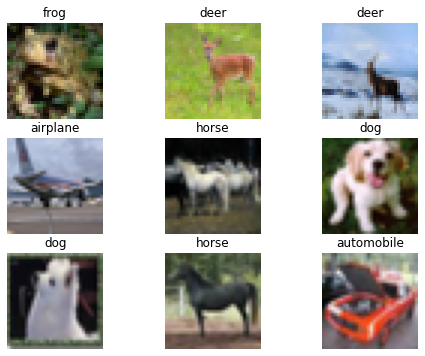

In [8]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.title(class_name[ y_train[idx]])
  plt.axis('off')
plt.show()

## 검증 데이터

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

X_train.shape, X_val.shape, X_test.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (10000, 32, 32, 3))

## 정규화

In [10]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [11]:
# 레이블 원핫인코딩
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)

In [12]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

## 모델 만들기

In [13]:
X_train.shape

(35000, 32, 32, 3)

In [14]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 14s 6ms/step - loss: 1.6119 - acc: 0.4059 - val_loss: 1.4153 - val_acc: 0.4937
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2537 - acc: 0.5548 - val_loss: 1.1978 - val_acc: 0.5765
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0974 - acc: 0.6157 - val_loss: 1.1067 - val_acc: 0.6073
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9898 - acc: 0.6543 - val_loss: 1.0501 - val_acc: 0.6301
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9103 - acc: 0.6823 - val_loss: 1.0137 - val_acc: 0.6526
Epoch 6/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8413 - acc: 0.7069 - val_loss: 0.9879 - val_acc: 0.6595
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7885 - acc: 0.7249 - val_loss: 0.9472 - val_acc: 0.6777
Epoch 8/30
1094/1094 [==============================] - 7s 7m

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

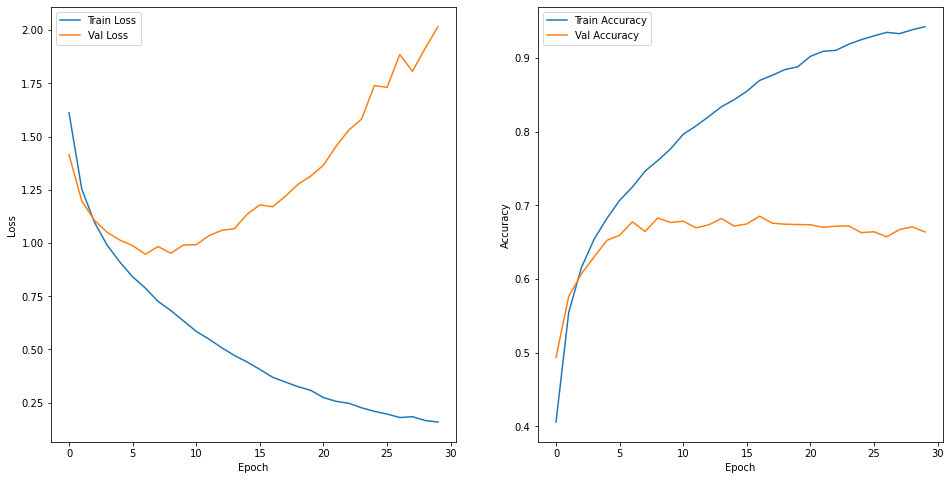

In [18]:
plot_history(log)

## Dropout :: 오버피팅 대응

In [19]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2),

    layers.Dropout(0.3),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Dropout(0.3),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Dropout(0.3),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

In [20]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.7908 - acc: 0.3290 - val_loss: 1.4889 - val_acc: 0.4709
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.4728 - acc: 0.4644 - val_loss: 1.4001 - val_acc: 0.5002
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.3637 - acc: 0.5099 - val_loss: 1.3059 - val_acc: 0.5418
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2934 - acc: 0.5351 - val_loss: 1.2393 - val_acc: 0.5647
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2515 - acc: 0.5559 - val_loss: 1.1631 - val_acc: 0.5969
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2132 - acc: 0.5671 - val_loss: 1.0965 - val_acc: 0.6161
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1798 - acc: 0.5784 - val_loss: 1.1385 - val_acc: 0.5971
Epoch 8/30
1094/1094 [==============================] - 6s 5ms

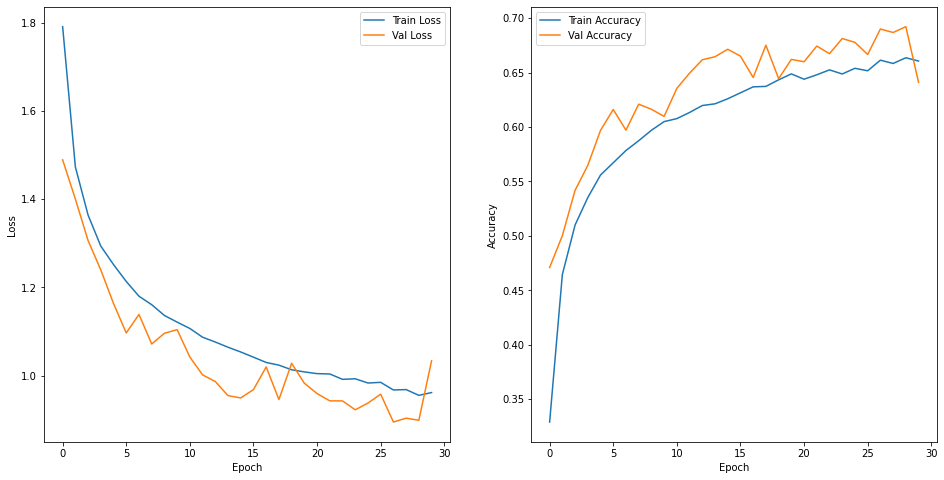

In [21]:
plot_history(log)

In [22]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 2s 5ms/step - loss: 1.0256 - acc: 0.6453


[1.0255584716796875, 0.6452999711036682]

## 배치정규화 (Batch Nomalization)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    # 배치 후에 relu
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                verbose = 1)

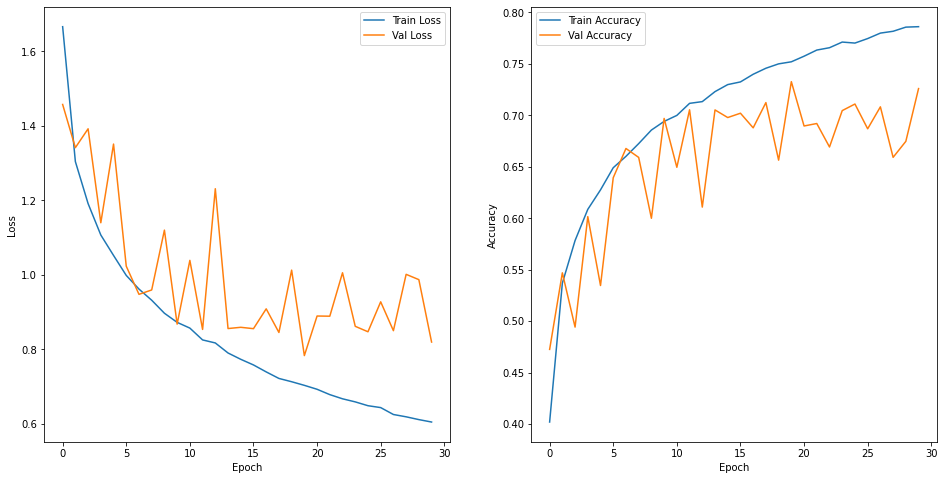

In [26]:
plot_history(log)

In [27]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 0.8130 - acc: 0.7257


[0.8129570484161377, 0.7257000207901001]

### optimizer 변경

In [29]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    # 배치 후에 relu
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6400 - acc: 0.4135 - val_loss: 1.5937 - val_acc: 0.4566
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.3090 - acc: 0.5366 - val_loss: 1.2769 - val_acc: 0.5407
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1892 - acc: 0.5819 - val_loss: 1.0934 - val_acc: 0.6120
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1027 - acc: 0.6147 - val_loss: 1.3017 - val_acc: 0.5484
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0459 - acc: 0.6381 - val_loss: 1.5961 - val_acc: 0.5221
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9984 - acc: 0.6518 - val_loss: 1.0005 - val_acc: 0.6486
Epoch 7/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9537 - acc: 0.6669 - val_loss: 0.9327 - val_acc: 0.6735
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

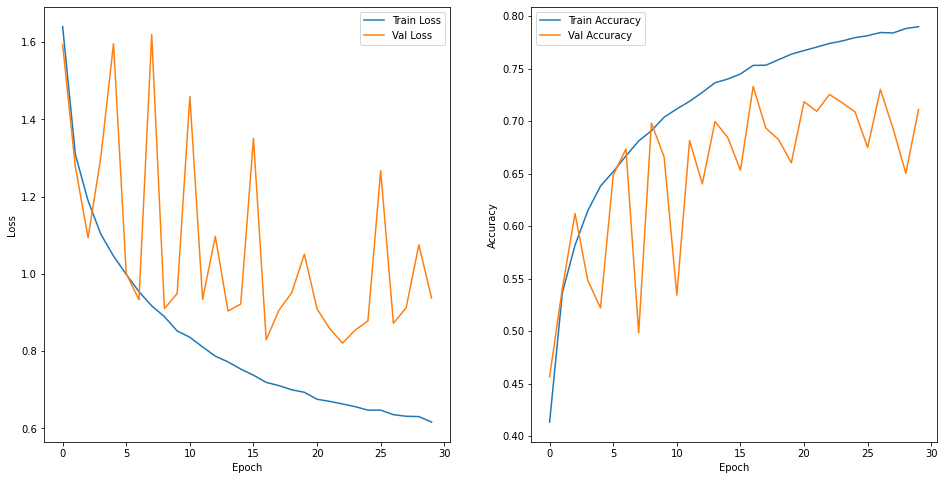

In [33]:
plot_history(log)

In [35]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 2s 6ms/step - loss: 0.9307 - acc: 0.7198


[0.9307286143302917, 0.7197999954223633]

## 모델 체크포인트 콜백

In [37]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    # 배치 후에 relu
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

In [50]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'
# 체크포인트 저장할 파일 이름

ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor = 'val_loss',
    # val loss가 더 떨어지면 좋아졌다고 판단하고 저장
    save_weights_only = True,
    # w와 b값만 저장
    save_best_only = True,
    verbose = 1
)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                callbacks = [ckpt_callback],
                verbose = 1)

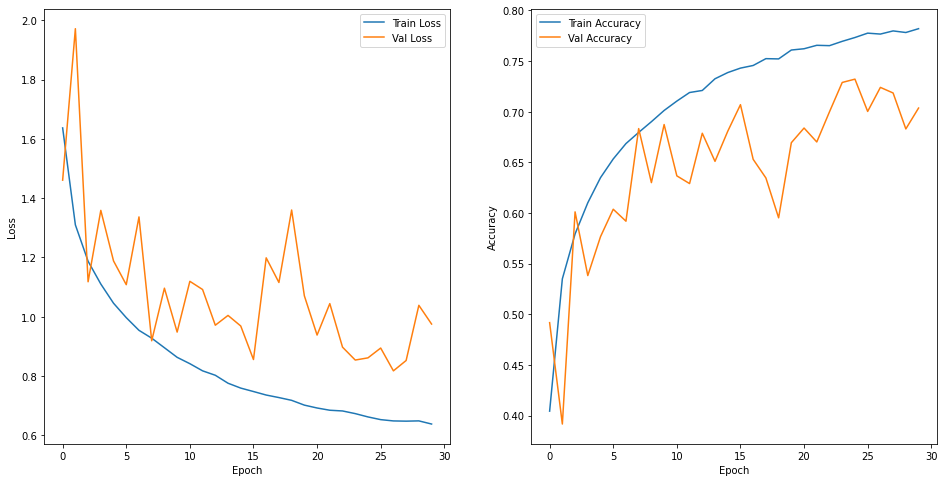

In [43]:
plot_history(log)

In [44]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 2s 5ms/step - loss: 0.9698 - acc: 0.7027


[0.9698413014411926, 0.7027000188827515]

In [45]:
model.load_weights(ckpt_path)
# best 상태의 weight, 절편 등 파라미터들을 가져온다

In [46]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 1s 4ms/step - loss: 0.7963 - acc: 0.7352


[0.7963272333145142, 0.7351999878883362]

## EarlyStopping

In [48]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    # 배치 후에 relu
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),
    # 여기까지가 필터 학습

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics = ['acc']
)

In [54]:
from tensorflow.keras import callbacks

es_callback = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3
)

In [55]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val_o),
                callbacks = [ckpt_callback, es_callback],
                verbose = 1)

Epoch 1/30
1089/1094 [============================>.] - ETA: 0s - loss: 0.6924 - acc: 0.7627
Epoch 1: val_loss did not improve from 0.81100
1094/1094 [==============================] - 7s 7ms/step - loss: 0.6926 - acc: 0.7625 - val_loss: 0.8325 - val_acc: 0.7223
Epoch 2/30
1086/1094 [============================>.] - ETA: 0s - loss: 0.6798 - acc: 0.7672
Epoch 2: val_loss did not improve from 0.81100
1094/1094 [==============================] - 9s 8ms/step - loss: 0.6799 - acc: 0.7672 - val_loss: 0.8881 - val_acc: 0.7054
Epoch 3/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.6783 - acc: 0.7678
Epoch 3: val_loss did not improve from 0.81100
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6786 - acc: 0.7677 - val_loss: 0.8324 - val_acc: 0.7299
Epoch 4/30
1091/1094 [============================>.] - ETA: 0s - loss: 0.6664 - acc: 0.7696
Epoch 4: val_loss did not improve from 0.81100
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6667

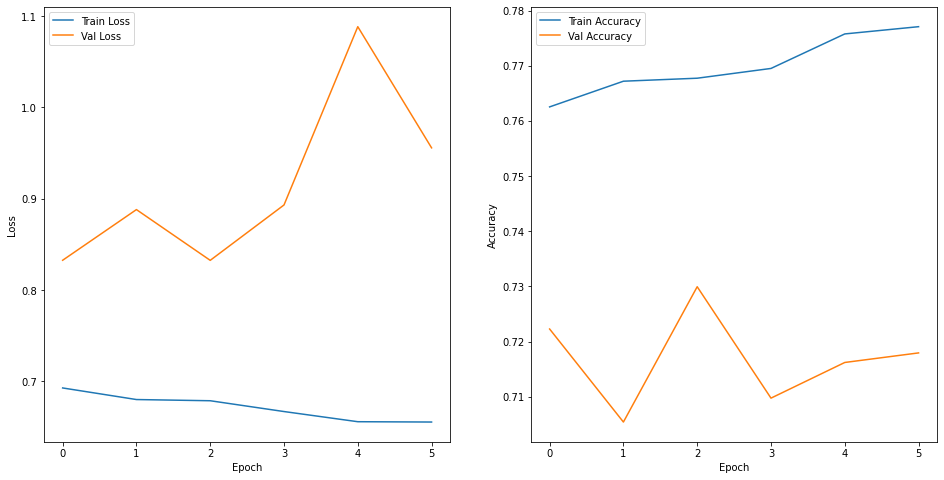

In [58]:
plot_history(log)

In [56]:
model.load_weights(ckpt_path)

In [57]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 0.7921 - acc: 0.7391


[0.7920992970466614, 0.7390999794006348]